# Risk Factor Clinical Classifier

This classifier takes patient answers to the Lung Space clinical survey and predicts the chance of cancer.

## Import dataset and build dataframe

In [190]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

df = pd.read_csv('../data/lungspace/package-nlst-1193.2024-02-20/participant_d040722.csv')


# Breakdown of positive and negative sample size
print("positive: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 1].to_list()), " negative: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 0].to_list()))

# Features
features_demographic = ['age', 'weight', 'height', 'gender', 'educat', 'ethnic', 'race']
features_smoking = ["cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr"]
features_screening = ['num_screens']
features_follow_up_procedures = ["biop0","biop1","biop2","bioplc","invas0","invas1","invas2","invaslc","medcomp0","medcomp1","medcomp2","medcomplc","mra_stat0","mra_stat1","mra_stat2","no_proc_reas0","no_proc_reas1","no_proc_reas2","proc0","proc1","proc2"]
features_work_history = ["resasbe","resbaki","resbutc","reschem","resfarm","resfire","resflou","resfoun","reshard","respain","ressand","resweld","wrkasbe","wrkbaki","wrkbutc","wrkchem","wrkcoal","wrkcott","wrkfarm","wrkfire","wrkflou","wrkfoun","wrkhard","wrkpain","wrksand","wrkweld"]
features_disease_history = ["ageadas","ageasbe","agebron","agechas","agechro","agecopd","agediab","ageemph","agehear","agehype","agepneu","agestro","agetube","diagadas","diagasbe","diagbron","diagchas","diagchro","diagcopd","diagdiab","diagemph","diagfibr","diaghear","diaghype","diagpneu","diagsarc","diagsili","diagstro","diagtube"]
features_family_history = ["fambrother","famchild","famfather","fammother","famsister"]
features_alcohol = ["acrin_alc_curr","acrin_alc_ever","acrin_drink24hr","acrin_drinknum_curr","acrin_drinknum_form","acrin_drinkyrs_curr","acrin_drinkyrs_form","acrin_lastdrink","lss_alcohol_freq","lss_alcohol_num"]
output_column = ['lung_cancer']


positive:  2058  negative:  51394


/tmp/ipykernel_6654/3375708775.py:8: DtypeWarning: Columns (239,240,348) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/lungspace/package-nlst-1193.2024-02-20/participant_d040722.csv')


## Choose features to include

### Features: Demographics and Smoking

- Random forest (default): 99.8% accuracy
- K Nearest Neighbor: 94% accuracy
- Logistic Regression: 70% accuracy

In [191]:
# dataset_columns = features_demographic + features_smoking + output_column


### Features: Demographics, Smoking, Work History, Family History, Alcohol

- Random forest (default): 99.9% accuracy
- K Nearest Neighbor (3 neighbors): 94%
- Logistic Regression: 64%

In [192]:
# dataset_columns = features_demographic + features_smoking + features_work_history + features_disease_history + features_family_history + features_alcohol + output_column
dataset_columns = features_demographic + features_smoking + features_work_history + features_disease_history + output_column


### Features: Demographics, Work History, Family History, Alcohol

- Random forest (default): 98% accuracy
- KNN (3 neighbors): 93% accuracy
- Logistic Regression: 59% accuracy

In [193]:
# dataset_columns = features_demographic + features_work_history + features_family_history + features_alcohol + output_column


## Remove null values and add weight/height field

In [194]:
# Build dataframe
df = df[dataset_columns]
for i in dataset_columns[:]:
  if df[i].isna().sum() > 2000:
    df = df.drop(i, axis=1)
    dataset_columns.remove(i)

# print(df.isnull().sum(axis = 0).sort_values(ascending=False).to_string())

df = df.dropna()

# df.insert(2, 'weight_div_height', df['weight'] / df['height'])

print(df)


       age  weight  height  gender  educat  ethnic  race  cigar  cigsmok  \
0       70   134.0    70.0       1       2       2     1    1.0        1   
1       66   175.0    68.0       1       3       2     1    0.0        1   
2       64   180.0    70.0       1       3       2     1    0.0        1   
3       60   205.0    70.0       1       5       2     1    0.0        0   
4       64   220.0    67.0       1       2       2     1    0.0        0   
...    ...     ...     ...     ...     ...     ...   ...    ...      ...   
53446   64   146.0    67.0       2       5       2     1    0.0        1   
53447   73   206.0    64.0       2       3       2     1    0.0        1   
53448   66   175.0    71.0       1       2       2     1    0.0        1   
53449   56   172.0    72.0       1       5       2     1    1.0        0   
53451   57   220.0    69.0       1       7       2     1    0.0        1   

       pipe  ...  diagemph  diagfibr  diaghear  diaghype  diagpneu  diagsarc  \
0      

In [195]:
temp_columns = df.columns.to_list()

for c in features_disease_history:
  if c in temp_columns:
    print("!!!!!!!!!!!")
    print(df[c].value_counts())


!!!!!!!!!!!
diagadas
0.0    48443
1.0     3123
Name: count, dtype: int64
!!!!!!!!!!!
diagasbe
0.0    51056
1.0      510
Name: count, dtype: int64
!!!!!!!!!!!
diagbron
0.0    49899
1.0     1667
Name: count, dtype: int64
!!!!!!!!!!!
diagchas
0.0    49723
1.0     1843
Name: count, dtype: int64
!!!!!!!!!!!
diagchro
0.0    46693
1.0     4873
Name: count, dtype: int64
!!!!!!!!!!!
diagcopd
0.0    49040
1.0     2526
Name: count, dtype: int64
!!!!!!!!!!!
diagdiab
0.0    46572
1.0     4994
Name: count, dtype: int64
!!!!!!!!!!!
diagemph
0.0    47684
1.0     3882
Name: count, dtype: int64
!!!!!!!!!!!
diagfibr
0.0    51442
1.0      124
Name: count, dtype: int64
!!!!!!!!!!!
diaghear
0.0    44993
1.0     6573
Name: count, dtype: int64
!!!!!!!!!!!
diaghype
0.0    33250
1.0    18316
Name: count, dtype: int64
!!!!!!!!!!!
diagpneu
0.0    40227
1.0    11339
Name: count, dtype: int64
!!!!!!!!!!!
diagsarc
0.0    51473
1.0       93
Name: count, dtype: int64
!!!!!!!!!!!
diagsili
0.0    51514
1.0       52
Name

In [196]:
temp_columns = df.columns.to_list()

for c in features_work_history:
  if c in temp_columns:
    print("!!!!!!!!!!!")
    print(df[c].value_counts())


!!!!!!!!!!!
wrkasbe
0.0    49152
1.0     2414
Name: count, dtype: int64
!!!!!!!!!!!
wrkbaki
0.0    50476
1.0     1090
Name: count, dtype: int64
!!!!!!!!!!!
wrkbutc
0.0    50459
1.0     1107
Name: count, dtype: int64
!!!!!!!!!!!
wrkchem
0.0    48385
1.0     3181
Name: count, dtype: int64
!!!!!!!!!!!
wrkcoal
0.0    51245
1.0      321
Name: count, dtype: int64
!!!!!!!!!!!
wrkcott
0.0    51193
1.0      373
Name: count, dtype: int64
!!!!!!!!!!!
wrkfarm
0.0    46105
1.0     5461
Name: count, dtype: int64
!!!!!!!!!!!
wrkfire
0.0    50613
1.0      953
Name: count, dtype: int64
!!!!!!!!!!!
wrkflou
0.0    51011
1.0      555
Name: count, dtype: int64
!!!!!!!!!!!
wrkfoun
0.0    49403
1.0     2163
Name: count, dtype: int64
!!!!!!!!!!!
wrkhard
0.0    51168
1.0      398
Name: count, dtype: int64
!!!!!!!!!!!
wrkpain
0.0    48901
1.0     2665
Name: count, dtype: int64
!!!!!!!!!!!
wrksand
0.0    50702
1.0      864
Name: count, dtype: int64
!!!!!!!!!!!
wrkweld
0.0    48730
1.0     2836
Name: count, dtype

In [197]:
temp_columns = df.columns.to_list()

for c in features_smoking:
  if c in temp_columns:
    print("!!!!!!!!!!!")
    print(df[c].value_counts())


!!!!!!!!!!!
cigar
0.0    40468
1.0    11098
Name: count, dtype: int64
!!!!!!!!!!!
cigsmok
0    26737
1    24829
Name: count, dtype: int64
!!!!!!!!!!!
pipe
0.0    39578
1.0    11988
Name: count, dtype: int64
!!!!!!!!!!!
pkyr
40.00     2002
45.00     1533
42.00     1506
39.00     1494
35.00     1297
          ... 
49.60        1
56.55        1
122.00       1
199.50       1
95.40        1
Name: count, Length: 556, dtype: int64
!!!!!!!!!!!
smokeage
18.0    7505
16.0    7460
15.0    6549
17.0    4738
14.0    4584
20.0    4036
13.0    3195
19.0    3051
12.0    2440
21.0    2051
22.0    1019
10.0     819
25.0     705
11.0     655
23.0     496
9.0      350
24.0     315
8.0      265
30.0     235
26.0     179
7.0      137
27.0     136
28.0     114
6.0      104
5.0       74
35.0      66
29.0      42
31.0      41
32.0      41
40.0      29
33.0      25
34.0      24
36.0      15
38.0      14
4.0       10
37.0       8
2.0        7
42.0       6
39.0       6
3.0        5
44.0       4
45.0       4
43.0 

In [198]:
temp_columns = df.columns.to_list()

for c in features_demographic:
  if c in temp_columns:
    print("!!!!!!!!!!!")
    print(df[c].value_counts())


!!!!!!!!!!!
age
55    5224
56    5010
57    4249
59    3892
60    3851
58    3769
61    3393
62    3049
63    2844
64    2644
65    2394
66    1934
67    1793
68    1641
69    1364
70    1274
71    1047
72     926
73     769
74     490
75       3
50       1
52       1
43       1
49       1
54       1
79       1
Name: count, dtype: int64
!!!!!!!!!!!
weight
180.0    2123
200.0    1913
190.0    1876
160.0    1834
170.0    1782
         ... 
411.0       1
329.0       1
446.0       1
348.0       1
328.0       1
Name: count, Length: 282, dtype: int64
!!!!!!!!!!!
height
70.0    5354
68.0    4529
72.0    4429
71.0    4403
66.0    4314
69.0    4077
67.0    4050
64.0    3792
65.0    3355
63.0    2800
62.0    2576
73.0    2129
74.0    1760
61.0    1194
60.0     869
75.0     807
76.0     462
59.0     233
77.0     188
78.0      83
58.0      60
79.0      27
57.0      19
80.0      15
83.0      10
81.0       8
82.0       4
55.0       3
53.0       3
49.0       3
54.0       2
48.0       1
51.0       1
4

## Downsample the negative samples to balance the dataset

In [199]:
# # Determines how many negative samples to include in the dataset
# # The frac value determines the percent of negative values that are excluded
# print(df)
# df = df.drop(df.query('lung_cancer == 0').sample(frac=.95).index)
# print(df)

# df = df[df[dataset_columns] >= 0]
# print("##############")
# print(df)

# print("!!!!!!!!!!!!!!!!!!!!!")

# for i in df.columns.to_list():
#   if df[i].isna().sum() > 500:
#     print(i)

# print("$$$$$$$$$$$$$")

# df = df.dropna()
# print(df)


## Duplicate the positive examples to balance the dataset

In [200]:
# Duplicate the positive samples to balance the dataset

# df_positives = df[df['lung_cancer'] == 1]
# print(df_positives)
# print(len(df_positives['lung_cancer'].to_list()))

# while len(df[df['lung_cancer'] == 1]['lung_cancer'].to_list()) < len(df[df['lung_cancer'] == 0]['lung_cancer'].to_list()):
#   df = pd.concat([df, df_positives])

# print(df)
# print("positive: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 1].to_list()), " negative: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 0].to_list()))


## Define models

In [201]:
from imblearn.over_sampling import RandomOverSampler


In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model names
names = [
    "Nearest Neighbors",
    "Linear SVM",
    # "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    # "Random Forest",
    # "Neural Net",
    # "AdaBoost",
    "Naive Bayes",
    "Logistic Regression"
    # "QDA",
]

# Models
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    # SVC(gamma=2, C=1, random_state=42),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    # RandomForestClassifier(
    #     max_depth=5, n_estimators=10, max_features=1, random_state=42
    # ),
    # MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    # AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=0)
    # QuadraticDiscriminantAnalysis(),
]


## Build training and test sets

In [203]:
# Use predict lung_cancer column
# X = df[['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"]]
X = df[dataset_columns[:-1]]
y = df[['lung_cancer']]

# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


## Balance the dataset to improve positive accuracy

### Oversample the imbalanced data with imbalance-learn library

In [204]:
# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.over_sampling import SMOTE, ADASYN
# # X_train, y_train = SMOTE().fit_resample(X_train, y_train)
# # X_train, y_train = ADASYN().fit_resample(X_train, y_train)


### Or oversample positive samples manually by duplicating them in the training set

In [205]:
# X_train_positives = []
# X_test_positives = []
# y_train_positives = []
# y_test_positives = []

# train_temp = pd.concat([X_train, y_train['lung_cancer']], axis=1)
# test_temp = pd.concat([X_test, y_test['lung_cancer']], axis=1)

# df_train_positives = train_temp[train_temp['lung_cancer'] == 1]
# print(df_train_positives)
# print(len(df_train_positives['lung_cancer'].to_list()))

# while len(train_temp[train_temp['lung_cancer'] == 1]['lung_cancer'].to_list()) < len(train_temp[train_temp['lung_cancer'] == 0]['lung_cancer'].to_list()):
#   train_temp = pd.concat([train_temp, df_train_positives])

# print(train_temp)
# print("positive: ", len(train_temp['lung_cancer'].loc[train_temp['lung_cancer'] == 1].to_list()), " negative: ", len(train_temp['lung_cancer'].loc[train_temp['lung_cancer'] == 0].to_list()))

# ##########

# df_test_positives = test_temp[test_temp['lung_cancer'] == 1]
# print(df_test_positives)
# print(len(df_test_positives['lung_cancer'].to_list()))

# while len(test_temp[test_temp['lung_cancer'] == 1]['lung_cancer'].to_list()) < len(test_temp[test_temp['lung_cancer'] == 0]['lung_cancer'].to_list()):
#   test_temp = pd.concat([test_temp, df_test_positives])

# print(test_temp)
# print("positive: ", len(test_temp['lung_cancer'].loc[test_temp['lung_cancer'] == 1].to_list()), " negative: ", len(test_temp['lung_cancer'].loc[test_temp['lung_cancer'] == 0].to_list()))


# y_train = pd.DataFrame({'lung_cancer': train_temp['lung_cancer']})

# print("TRAIN TEMP")
# print(train_temp)
# train_temp = train_temp.drop('lung_cancer', axis=1)
# X_train = train_temp

# y_test = pd.DataFrame({'lung_cancer': test_temp['lung_cancer']})

# test_temp = test_temp.drop('lung_cancer', axis=1)
# X_test = test_temp


In [206]:
print(y_train)
print(y_test)

print("positive training sample: ", len(list(filter(lambda x: x == 1.0, y_train['lung_cancer'].to_list()))))
print("negative training sample: ", len(list(filter(lambda x: x == 0.0, y_train['lung_cancer'].to_list()))))
print("positive training sample: ", len(list(filter(lambda x: x == 1.0, y_test['lung_cancer'].to_list()))))
print("negative training sample: ", len(list(filter(lambda x: x == 0.0, y_test['lung_cancer'].to_list()))))


       lung_cancer
10166            0
6957             0
45071            0
16615            0
21606            0
...            ...
11596            0
46259            0
39348            0
885              0
16219            0

[30939 rows x 1 columns]
       lung_cancer
27733            0
33886            0
49872            0
19367            0
38422            0
...            ...
4632             0
13891            0
7365             0
46374            0
18485            0

[20627 rows x 1 columns]
positive training sample:  1203
negative training sample:  29736
positive training sample:  767
negative training sample:  19860


## Test models and plot confusion matrices

The goal is to minimize the number of false negative predictions.

In [207]:
# for name, clf in zip(names, classifiers):
#   clf = make_pipeline(StandardScaler(), clf)
#   clf.fit(normalize(X_train), y_train)
#   y_pred = clf.predict(normalize(X_test))

#   score = accuracy_score(y_test, y_pred)
#   conf_matrix = confusion_matrix(y_test, y_pred)
#   disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
#   disp.plot()
#   print("Model: ", name, " score: ", score)



# for name, m in zip(names, classifiers):
#   # clf = m = SVC(kernel="linear", C=0.025, random_state=42, probability=True)
#   clf = make_pipeline(StandardScaler(), m)
#   clf.fit(normalize(X_train), y_train)
#   y_pred = clf.predict(normalize(X_test))
#   # y_pred_prob = clf.predict_proba(X_test)

#   print(name)
#   # print(y_pred_prob)

#   score = accuracy_score(y_test, y_pred)
#   conf_matrix = confusion_matrix(y_test, y_pred)
#   print(conf_matrix)
#   print(f"Accuracy on positive samples: {conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])}")
#   print(f"Accuracy on negative samples: {conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])}")
#   disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
#   disp.plot()
#   print("Model: ", name, " score: ", score)


## Get confidence of each prediction with `predict_proba()`

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.49507928 0.50492072]
 [0.63649408 0.36350592]
 [0.53824037 0.46175963]
 ...
 [0.40434202 0.59565798]
 [0.49210556 0.50789444]
 [0.34622465 0.65377535]]
[[ 8665 11195]
 [  151   616]]
Accuracy on positive samples: 0.803129074315515
Accuracy on negative samples: 0.43630412890231624
Model:  Logistic Regression  score:  0.4499442478305134


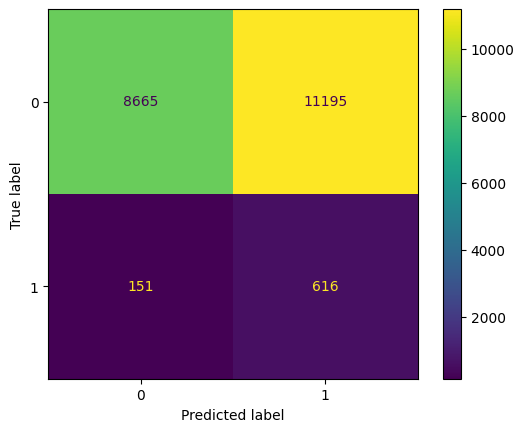

In [208]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
import pickle

# # X_train, y_train = SMOTE().fit_resample(X_train, y_train)
# # X_train, y_train = ADASYN().fit_resample(X_train, y_train)
m = LogisticRegression(random_state=0)
clf = make_pipeline(
    ClusterCentroids(random_state=0), # good
    # SMOTE(), # good
    # ADASYN(),
    m
)

# clf = m = SVC(kernel="linear", C=0.025, random_state=42, probability=True)
# clf = make_pipeline(StandardScaler(), clf)
clf.fit(normalize(X_train), y_train)

with open('screening_classifier.pkl','wb') as f:
  pickle.dump(clf,f)

y_pred = clf.predict(normalize(X_test))
y_pred_prob = clf.predict_proba(normalize(X_test))

print(y_pred_prob)

# skew results
for i in range(len(y_pred)):
  if y_pred[i] == 0 and y_pred_prob[i][0] <= 0.52:
    y_pred[i] = 1

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy on positive samples: {conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])}")
print(f"Accuracy on negative samples: {conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
print("Model: ", "Logistic Regression", " score: ", score)


## Rank features used 

In [209]:
# Create lists of feature names and coefficients
column_labels = X_train.columns.tolist()
coef = m.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))
# Order by most significant features (positive or negative)
feature_ranks = sorted(labels_coef, key=lambda x: abs(x[1]), reverse=True)

print(feature_ranks)


[('smokeyr', 5.346500339509188), ('smokeday', -3.6648876838893854), ('pkyr', 3.1453599447545213), ('weight', 2.3649028560890093), ('smokeage', -1.4802856755496967), ('ethnic', -1.458913585013767), ('educat', -1.4453652028435744), ('race', -1.3583065970699408), ('age', 0.5943781897933539), ('gender', -0.20900737487949467), ('cigsmok', 0.19891452565188275), ('diagemph', 0.11717690124504304), ('diagcopd', 0.09508172956359226), ('height', 0.08294863675580925), ('diaghear', 0.06579066839835894), ('pipe', 0.05432237697757261), ('diaghype', -0.03570425981902484), ('wrkweld', 0.0315791887702001), ('smokework', 0.02878931206311766), ('wrkasbe', 0.02850227322478505), ('wrkchem', 0.027505448840167), ('smokelive', -0.024833762508941485), ('diagasbe', 0.023845153247197295), ('diagpneu', 0.019781738553009524), ('diagbron', 0.019432362362461642), ('diagchro', 0.019414369828671917), ('wrkfire', 0.01891395770527059), ('diagadas', -0.015760170012195245), ('wrkfoun', 0.015001865645625799), ('diagchas', 0

## Compare compare the probabilities of false positives and false negatives to true positives and true negatives

In [210]:
true_negative_probs = []
false_negative_probs = []
true_positive_probs = []
false_positive_probs = []

y_pred_list = y_pred.tolist()
y_pred_prob_list = y_pred_prob.tolist()
y_test_list = y_test['lung_cancer'].tolist()

for i in range(len(y_test)):
  # true negative
  if y_pred_list[i] == 0 and y_test_list[i] == 0:
    true_negative_probs.append(y_pred_prob_list[i][0])
  # false negative
  elif y_pred_list[i] == 0 and y_test_list[i] == 1:
    false_negative_probs.append(y_pred_prob_list[i][0])
  # true positive
  elif y_pred_list[i] == 1 and y_test_list[i] == 1:
    true_positive_probs.append(y_pred_prob_list[i][1])
  # false positive
  else:
    false_positive_probs.append(y_pred_prob_list[i][1])


## Plot the confidence intervals that led to the different predictions. 

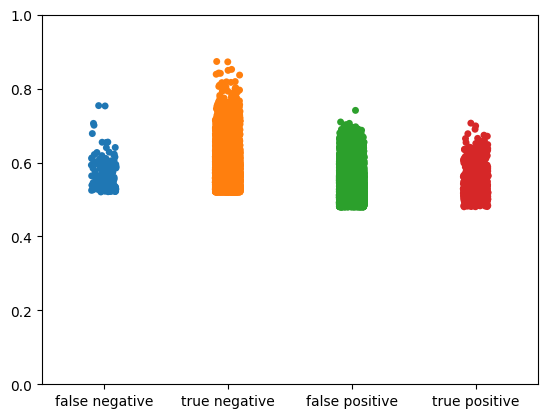

In [211]:
data = {'false negative': false_negative_probs,
               'true negative': true_negative_probs,
               'false positive': false_positive_probs,
               'true positive': true_positive_probs,
              }
cols = ['false negative', 'true negative', 'false positive', 'true positive']

df = pd.DataFrame.from_dict(
    data=dict(data),
    orient='index',
).T

fig, ax = plt.subplots()

ax = sns.stripplot(data=df)
ax.set_ylim(0, 1)

plt.show()


/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model:  KNN  score:  0.5730353420274398


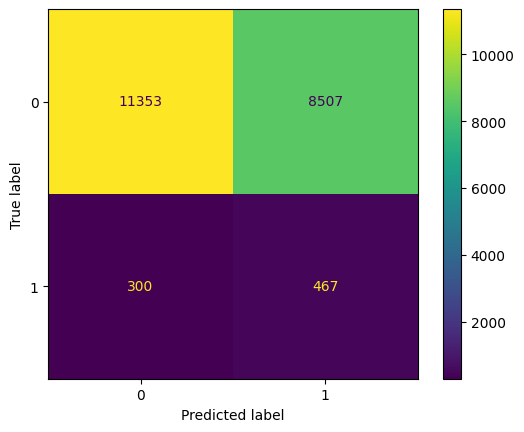

In [212]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

m = KNeighborsClassifier(3)
clf = make_pipeline(
    RandomUnderSampler(random_state=0),
    # ClusterCentroids(random_state=0), # good
    # NearMiss(version=1),
    # SMOTE(), # good
    # ADASYN(),
    m
)
# clf = make_pipeline(StandardScaler(), clf)
clf.fit(normalize(X_train), y_train)
y_pred = clf.predict(normalize(X_test))
y_pred_prob = clf.predict_proba(normalize(X_test))

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
print("Model: ", "KNN", " score: ", score)

# # Fit logistic regression model
# model2 = KNeighborsClassifier(3)
# model2.fit(X_train, y_train)

# # Get confidence intervals for each prediction
# y_pred_prob = model2.predict_proba(X_test)
# # Get predicted values
# y_pred = model2.predict(normalize(X_test))

# # Get prediction accuracy
# score = accuracy_score(y_test, y_pred)
# # Get breakdown of false/true positives and false/true negatives
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Display results
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
# disp.plot()
# print("Model: ", "KNN", " score: ", score)


/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model:  Random Forest  score:  0.6167159548165027


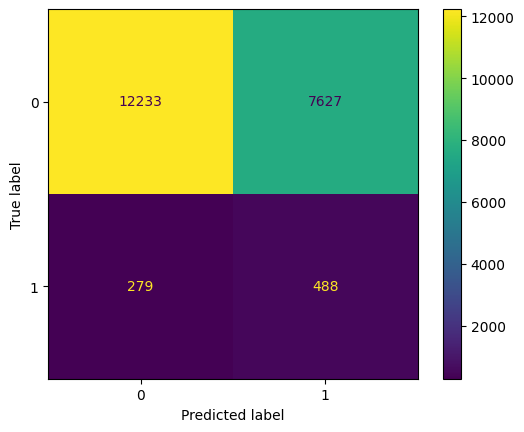

In [213]:
m = RandomForestClassifier()
clf = make_pipeline(
    RandomUnderSampler(random_state=0),
    # ClusterCentroids(random_state=0), # good
    # NearMiss(version=1),
    # SMOTE(), # good
    # ADASYN(),
    m
)
# clf = make_pipeline(StandardScaler(), clf)
clf.fit(normalize(X_train), y_train)
y_pred = clf.predict(normalize(X_test))
y_pred_prob = clf.predict_proba(normalize(X_test))

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
print("Model: ", "Random Forest", " score: ", score)


In [214]:
# Create lists of feature names and coefficients
column_labels = X_train.columns.tolist()
coef = m.feature_importances_

# Zip together
labels_coef = list(zip(column_labels, coef))
# Order by most significant features (positive or negative)
feature_ranks = sorted(labels_coef, key=lambda x: abs(x[1]), reverse=True)

print(feature_ranks)


[('smokeyr', 0.0825536661981066), ('pkyr', 0.08246876256689324), ('weight', 0.07493711633068192), ('educat', 0.060549119062219985), ('age', 0.06024522788254442), ('smokeage', 0.05770357987882861), ('smokeday', 0.057232876085815766), ('height', 0.05330882288596152), ('ethnic', 0.050758294462722196), ('gender', 0.049053395903547736), ('race', 0.04788274280446253), ('smokework', 0.0448448021305362), ('smokelive', 0.04288271600870918), ('cigsmok', 0.03386641395090164), ('diaghype', 0.02795351742935192), ('diagpneu', 0.018872689903078672), ('pipe', 0.01509756356808675), ('cigar', 0.014112124521007099), ('diaghear', 0.013663717003423958), ('diagemph', 0.011945098219118551), ('diagcopd', 0.01009205733716882), ('diagchro', 0.009482455736536563), ('wrkfarm', 0.009196440196738482), ('diagdiab', 0.008313265196598276), ('diagadas', 0.0069835147451962655), ('wrkchem', 0.006701514523346633), ('wrkasbe', 0.005603561130986578), ('diagchas', 0.005500164132424915), ('wrkpain', 0.005093047261444916), ('d

In [215]:
true_negative_probs = []
false_negative_probs = []
true_positive_probs = []
false_positive_probs = []

y_pred_list = y_pred.tolist()
y_pred_prob_list = y_pred_prob.tolist()
y_test_list = y_test['lung_cancer'].tolist()

for i in range(len(y_test)):
  # true negative
  if y_pred_list[i] == 0 and y_test_list[i] == 0:
    true_negative_probs.append(y_pred_prob_list[i][0])
  # false negative
  elif y_pred_list[i] == 0 and y_test_list[i] == 1:
    false_negative_probs.append(y_pred_prob_list[i][0])
  # true positive
  elif y_pred_list[i] == 1 and y_test_list[i] == 1:
    true_positive_probs.append(y_pred_prob_list[i][1])
  # false positive
  else:
    false_positive_probs.append(y_pred_prob_list[i][1])


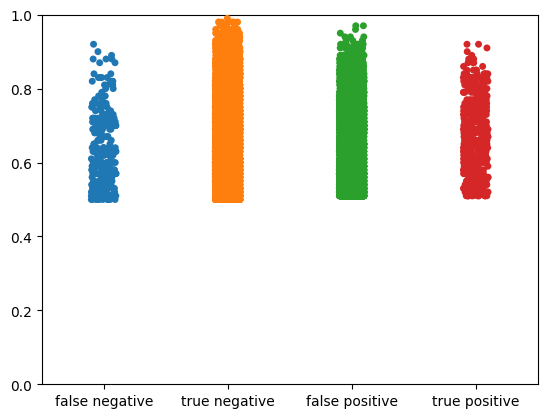

In [216]:
data = {'false negative': false_negative_probs,
               'true negative': true_negative_probs,
               'false positive': false_positive_probs,
               'true positive': true_positive_probs,
              }
cols = ['false negative', 'true negative', 'false positive', 'true positive']

df = pd.DataFrame.from_dict(
    data=dict(data),
    orient='index',
).T

fig, ax = plt.subplots()

ax = sns.stripplot(data=df)
ax.set_ylim(0, 1)

plt.show()


In [217]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(clf, X, y, cv=10)
# print(scores)


In [218]:
# from sklearn.svm import OneClassSVM

# clf = OneClassSVM(gamma='auto').fit(X_train)

# output = clf.predict(X_train)

# print()


In [219]:
# print(output)

# print(len(output))
# print(len(y_train))

# print(y_train)

# false_pos = 0
# false_neg = 0
# true_pos = 0
# true_neg = 0

# for i in range(len(output)):
#   if output[i] == 1 and y_train.iloc[i]['lung_cancer'] == 0:
#     true_neg += 1
#   elif output[i] == 1 and y_train.iloc[i]['lung_cancer'] == 1:
#     false_neg += 1
#   elif output[i] == -1 and y_train.iloc[i]['lung_cancer'] == 0:
#     false_pos += 1
#   else:
#     true_pos += 1

# print("false_pos: ", false_pos, " true_pos ", true_pos, " false_neg ", false_neg, " true_neg ", true_neg)


In [220]:
# scores = clf.score_samples(X_train)


In [221]:
# print(sorted(scores, reverse=True))

# new_output = output[:]

# for i in range(len(new_output)):
#   if scores[i] < 2 and new_output[i] == -1:
#     new_output[i] = 1
#   elif scores[i] >= 2 and new_output[i] == 1:
#     new_output[i] = -1

# false_pos = 0
# false_neg = 0
# true_pos = 0
# true_neg = 0

# for i in range(len(output)):
#   if new_output[i] == 1 and y_train.iloc[i]['lung_cancer'] == 0:
#     true_neg += 1
#   elif new_output[i] == 1 and y_train.iloc[i]['lung_cancer'] == 1:
#     false_neg += 1
#   elif new_output[i] == -1 and y_train.iloc[i]['lung_cancer'] == 0:
#     false_pos += 1
#   else:
#     true_pos += 1

# print("false_pos: ", false_pos, " true_pos ", true_pos, " false_neg ", false_neg, " true_neg ", true_neg)
